## Pre-ensemble 

In [10]:
# define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'     
blue4 = '#3182bd'     # passenger colour
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'   # dev colour
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'     # neutral drift colour
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [11]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [12]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit
import csv
from scipy.integrate import simps
import cmath
import mpmath as mp

## define parameters

In [13]:
Razavitotal = 47
Boltontotal = 4160

# coding region size on Razavi panel
Razavi_panel_size = 1282206

Bolton_v3panel_size = 896665  # bp
Bolton_v5panel_size = 1016478  # bp
Bolton_v6panel_size = 1139322  # bp
Bolton_panel_size = Bolton_v6panel_size  # bp


# ESTIMATING PANEL-SPECIFIC MUTATION RATES
# use the mutation rate scaled from the Illumina myeloid panel 
# targets coding regions and is most likely to have more similar mutation rates per bp to the MSK-IMPACT panels
# than averaging over the whole genome (as in Lee Six et al.) 
Illumina_myeloid_panel = 141*1000 # bp
syn_mu_on_Illumina_myeloid_panel =  8.5*10**-5  # calculated by exluding common germline base changes in 1000 genomes
nonsyn_mu_on_Illumina_myeloid_panel =  1.9*10**-4  # calculated by exluding common germline base changes in 1000 genomes
nonsynonymous_mu_per_bp = nonsyn_mu_on_Illumina_myeloid_panel/Illumina_myeloid_panel
synonymous_mu_per_bp = syn_mu_on_Illumina_myeloid_panel/Illumina_myeloid_panel
mu_per_bp = (nonsyn_mu_on_Illumina_myeloid_panel+syn_mu_on_Illumina_myeloid_panel)/Illumina_myeloid_panel
syn_total_mut_rate_ratio = synonymous_mu_per_bp/mu_per_bp
print('nonsynonymous_mu_per_bp', nonsynonymous_mu_per_bp)
print('synonymous_mu_per_bp', synonymous_mu_per_bp)
print('mu_per_bp',mu_per_bp)
print('ratio of synonymous mutation rate to total SNV mutation rate on Illumina panel', syn_total_mut_rate_ratio)


Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_v3panel_syn_mu = synonymous_mu_per_bp*Bolton_v3panel_size
Bolton_v5panel_syn_mu = synonymous_mu_per_bp*Bolton_v5panel_size
Bolton_v6panel_syn_mu = synonymous_mu_per_bp*Bolton_v6panel_size
Bolton_v3panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v3panel_size
Bolton_v5panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v5panel_size
Bolton_v6panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v6panel_size
Razavi_nonsynonymous_mu = nonsynonymous_mu_per_bp*Razavi_panel_size
Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_synonymous_mu = Bolton_v6panel_syn_mu
print('Bolton_synonymous_mu', Bolton_synonymous_mu)
print('Razavi_synonymous_mu', Razavi_synonymous_mu)
Bolton_nonsynonymous_mu = Bolton_v6panel_non_syn_mu
print('Razavi_nonsynonymous_mu', Razavi_nonsynonymous_mu)
print('Bolton_nonsynonymous_mu', Bolton_nonsynonymous_mu)

# This estimate is from Lee Six et al.
# NB:  if a mutation had mutant reads in greater than 120 out of 140 clonal
# colonies we considered it as germline
# Mutations that fell within 10 base pairs of each other or within 10 base pairs of
# indels were removed.
number_of_mutation_across_haploid_genome_per_cell_doubling = 1.84
# mappable genome size of GRCh37
haploid_genome_size = 2864785220

# assuming mutations are evenly distributed across coding versus non coding regions
Razavi_dev_per_doubling_synonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Razavi_panel_size/haploid_genome_size*syn_total_mut_rate_ratio
Bolton_dev_per_doubling_synonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Bolton_panel_size/haploid_genome_size*syn_total_mut_rate_ratio
print('Razavi_dev_per_doubling_synonymous_mu_LeeSix', Razavi_dev_per_doubling_synonymous_mu_LeeSix)
print('Bolton_dev_per_doubling_synonymous_mu_LeeSix', Bolton_dev_per_doubling_synonymous_mu_LeeSix)

Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Bolton_panel_size/haploid_genome_size*(1-syn_total_mut_rate_ratio)
print('Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix', Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix)

nonsynonymous_mu_per_bp 1.3475177304964539e-09
synonymous_mu_per_bp 6.028368794326241e-10
mu_per_bp 1.950354609929078e-09
ratio of synonymous mutation rate to total SNV mutation rate on Illumina panel 0.3090909090909091
Bolton_synonymous_mu 0.0006868253191489362
Razavi_synonymous_mu 0.0007729610638297872
Razavi_nonsynonymous_mu 0.001727795319148936
Bolton_nonsynonymous_mu 0.0015352565957446808
Razavi_dev_per_doubling_synonymous_mu_LeeSix 0.0002545480604841104
Bolton_dev_per_doubling_synonymous_mu_LeeSix 0.00022618222451531
Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix 0.0005055837959753989


## import Bolton cohort ages

In [11]:
# setting up Bolton untreated patients ID dictionary
import csv
filename="Bolton_published_patient_information.csv"

Untreated_patients_dictionary = {}

with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['Patient ID']
        treatment_status = str(row['Treatment Status'])
        age = float(row['Age'])

        if treatment_status == 'Untreated' and patient_id not in Untreated_patients_dictionary.keys():
            Untreated_patients_dictionary[patient_id]=age

print('Number of unique untreated patients', len(Untreated_patients_dictionary.keys()))

list_of_Bolton_ages = list(Untreated_patients_dictionary.values())
    
    
Boltontotal=len(Untreated_patients_dictionary.keys())
Bolton_mean_age = sum(list_of_Bolton_ages) / len(list_of_Bolton_ages)
print('Bolton_mean_age', Bolton_mean_age, 'variance', np.var(list_of_Bolton_ages))

Number of unique untreated patients 4160
Bolton_mean_age 59.6829042082087 variance 216.8520235412416


In [16]:
# only import Bolton nonsynonymous SNVs
filename = 'Bolton_nonsynonymous_SNVs_untreated_patients_from_4160_cohort.csv'

all_panels_non_syn_data = []
Bolton_non_syn_SNV_gene_dictionary = {}
trimming_upper_limit = 0.5
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        mutation_type = row['VariantClass']
        gene = row['Gene']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type == 'Missense_Mutation' or mutation_type == 'Nonsense_Mutation':
                if VAF < trimming_upper_limit:
                    all_panels_non_syn_data.append(VAF)

                    if gene not in Bolton_non_syn_SNV_gene_dictionary.keys():
                        Bolton_non_syn_SNV_gene_dictionary[gene]= [VAF]
                    else:
                        tmp_list = Bolton_non_syn_SNV_gene_dictionary[gene]
                        tmp_list.append(VAF)
                        Bolton_non_syn_SNV_gene_dictionary[gene]= tmp_list

print('Number of untreated patients', len(Untreated_patients_dictionary.keys()))
print('Number of nonsynonymous variants detected in untreated patients', len(all_panels_non_syn_data))

count_mutation_frequency = {}
for gene, list_of_vaf in Bolton_non_syn_SNV_gene_dictionary.items():
    count_mutation_frequency[gene] = len(list_of_vaf)
#     print('Gene', gene, 'mutated', len(list_of_vaf), 'many times.')
count_mutation_frequency_in_order = dict(sorted(count_mutation_frequency.items(), key=lambda item: item[1]))
list_of_genes_in_Bolton_nonsny_mutation_freq_order = list(count_mutation_frequency_in_order.keys())[::-1]
print('list_of_genes_in_Bolton_nonsny_mutation_freq_order', list_of_genes_in_Bolton_nonsny_mutation_freq_order)
print('list_of_genes_in_Bolton_nonsny_mutation_freq_order', len(list_of_genes_in_Bolton_nonsny_mutation_freq_order))

Number of untreated patients 4160
Number of nonsynonymous variants detected in untreated patients 1236
list_of_genes_in_Bolton_nonsny_mutation_freq_order ['DNMT3A', 'TET2', 'PPM1D', 'SF3B1', 'ATM', 'ASXL1', 'JAK2', 'TP53', 'SRSF2', 'CHEK2', 'EGFR', 'CBL', 'U2AF1', 'TSC2', 'GRIN2A', 'SH2B3', 'MED12', 'NF1', 'KMT2C', 'RAD21', 'PTPRS', 'FAT1', 'EPHA5', 'SPEN', 'BRCA2', 'POLE', 'ATRX', 'STAT5B', 'RPTOR', 'NOTCH4', 'PTCH1', 'PBRM1', 'NOTCH3', 'ARID1B', 'DNMT3B', 'KDM5A', 'MET', 'MGA', 'EPHA3', 'BRCA1', 'PTPRT', 'GNAS', 'STAT3', 'IDH2', 'EP300', 'RBM10', 'TERT', 'KDM5C', 'PREX2', 'SLX4', 'MST1R', 'HLA-B', 'CUL3', 'ARID2', 'RICTOR', 'POLD1', 'KDM6A', 'CTCF', 'STAG2', 'KMT2A', 'PLCG2', 'BCOR', 'KDR', 'EZH2', 'APC', 'ZRSR2', 'MDC1', 'CDK12', 'FLT3', 'DICER1', 'KMT2D', 'KRAS', 'ANKRD11', 'MST1', 'ROS1', 'FH', 'TGFBR1', 'CREBBP', 'ERBB3', 'FGFR1', 'IRS2', 'ARID1A', 'NOTCH1', 'PMS2', 'BRD4', 'ERBB2', 'FGF3', 'EPHA7', 'RPS6KA4', 'ABL1', 'ALK', 'CXCR4', 'FLT1', 'PAX5', 'GLI1', 'MTOR', 'CARD11', 'MPL

## apply DFE

In [20]:
import scipy.special as sc
p_inferred = 3
q_inferred = 0.1
s_max_inferred = float('inf')

weight_s= lambda s: np.exp(-((abs(s))/q_inferred)**p_inferred)
normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]

s_tolerance=3.5/100
s_upper = 1
print('The DFE has a lower cutt off at s=', s_tolerance)

The DFE has a lower cutt off at s= 0.035


# Contribution of different s's in the driver prediction

In [6]:
def Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s):
    return 2*N_tau*u_ben*(1+2*np.exp(l)/(1-2*np.exp(l)))*np.exp(- 2*N_tau*s/(np.exp(s*t)-1)*np.exp(l)/(1-2*np.exp(l))      )

def lin_nonsyn_density_cohort_ages(l, N_tau, u_ben, s, list_of_ages):
        
    predicted_density = 0

    for j in range(len(list_of_ages)):
        t=list_of_ages[j]
        theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
        predicted_density=predicted_density+(theory_binned/len(list_of_ages))

    return predicted_density

def lin_nonsyn_density_cohort_ages_with_DFE(l, N_tau, u_ben, s_lower, s_upper, list_of_ages):
            
    def after_summing_across_ages(s):
        
        u_driver_at_s = u_ben*np.exp(-((abs(s))/q_inferred)**p_inferred)/normalization
        
        predicted_density = 0
        
        for j in range(len(list_of_ages)):
            t=list_of_ages[j]
            theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_driver_at_s, s)
            predicted_density=predicted_density+(theory_binned/len(list_of_ages))
            
        return predicted_density 
    
    result = integrate.quad(after_summing_across_ages, s_lower, s_upper)[0]

    return result

def log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, u_ben, s_lower, s_upper, list_of_ages):
        
    
    
    def after_summing_across_ages(s):
        
        u_driver_at_s = u_ben*np.exp(-((abs(s))/q_inferred)**p_inferred)/normalization
        
        predicted_density = 0
        
        for j in range(len(list_of_ages)):
            t=list_of_ages[j]
            theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_driver_at_s, s)
            predicted_density=predicted_density+(theory_binned/len(list_of_ages))
            
        return predicted_density 
    
    result = integrate.quad(after_summing_across_ages, s_lower, s_upper)[0]

    return np.log(result)

In [33]:
def plot_log_hist_data_for_plot_solid_no_normalization(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
#     ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["$10^{-4}$","","", "", "", "", "", "", "", "$10^{-3}$","", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


for Bolton cohort, the normal density plot curve is [nan, -6.526775687156186, -6.484043405748421, -6.446311410984632, -6.4133144573337, -6.384712372182619, -6.360114712927233, -6.3391052839380215, -6.321263854856424, -6.306183504692984, -6.293483059087905, -6.28281487483933, -6.2738686925402645, -6.266372464713351, -6.260091057355905, -6.254823602996452, -6.250400119635337, -6.2466778448306135, -6.243537590047868, -6.240880305607386, -6.238623961299456, -6.236700788138215, -6.23505488754734, -6.233640190345475, -6.232418734781463, -6.2313592270422244, -6.230435846492305, -6.2296272595305, -6.228915809082635, -6.228286850550222, -6.227728208974723, -6.227229735948998, -6.226782948246073, -6.226380733171476, -6.2260171082639335, -6.2256870251906475, -6.225386209543829, -6.22511102978782, -6.2248583898758, -6.224625641094097, -6.224410509538137, -6.224211036310689, -6.224025528089405, -6.2238525161592895, -6.223690722368801, -6.223539030760205, -6.223396463860787, -6.223262162811464, -6.2

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


for Bolton cohort, the normal density plot curve is [nan, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -704.0022666087757, -458.7090800832933, -299.15178339414894, -195.55368042079053, -128.40234497903074, -84.94285623623567, -56.853072463975714, -38.70432963384519, -26.959390162066306, -19.333208679034954, -14.353365204221637, -11.046636231472501, -8.748889268713189, -7.028944057590973, -5.6691447981176495, -4.579038478152541, -3.703419531076835, -2.995461028695079, -2.4124071732118058, -1.9190293890991637, -1.4921598928294317, -1.118264466515989, -0.7880802229366752, -0.49456388905147786, -0.23286871497318898, 0.0006156893910080688, 0.20950027829455162, 0.3975303235812873, 0.5679634388987614, 0.723081123225628, 0.8641878070397147, 0.991991611238616, 1.1070688429946285, 1.2101849536099876, 1.3023906170179682, 1.3849088170584078, 1.4589199755412712, 1.5254026653063992, 1.5851205369417667, 1.638

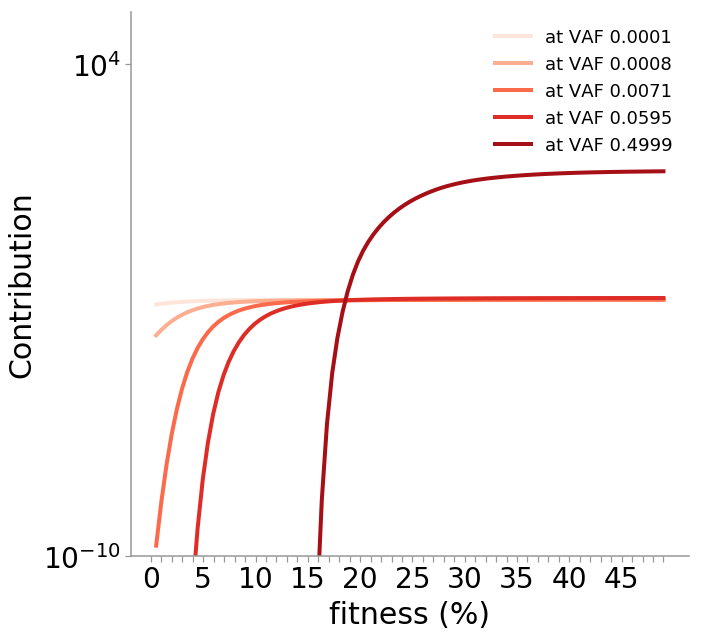

In [17]:
# normal density plot for Bolton cohort age dist (amplitude is an aribitrary factor)
N_tau = 10**5
demonstration_age = 80

lmin = np.log(0.01/100)
lmax = np.log(0.4999)
s_vector = np.linspace(0, 0.5, 100)

plt.close('all')
scale = 1.2
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

count = 0
colour_list=[red1, red2, red3, red4, red5]
for log_freq in np.linspace(lmin, lmax, 5):
    
    Integrand = [np.log(lin_nonsyn_density_cohort_ages(log_freq, N_tau, 10**-8, s1, list_of_Bolton_ages)) for s1 in s_vector]
    print('for Bolton cohort, the normal density plot curve is', Integrand)
    ax1.plot(s_vector, Integrand, c = colour_list[count], lw = 4, label= 'at VAF %s' % round(np.exp(log_freq),4))

    count = count + 1

    # Set axis limits
ax1.set_ylim(np.log(10**-10), np.log(3*10**5))
# ax1.set_xlim(-9, 0)

# # Axis labels
axisfont=14*2
axislabelfont=15*2

ax1.set_xlabel('fitness (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
ax1.set_ylabel('Contribution', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

x_major_ticks = np.linspace(0,0.5,50)
x_major_tick_labels = ["0","", "","","","5","", "","","", "10","", "","","","15","", "","","", "20","", "","","", "25","", "","","", "30"\
                       ,"", "","","", "35","", "","","", "40","", "","","", "45","", "","","", "50"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =[np.log(10**-10), np.log(10**4)]
y_major_tick_labels = ["$10^{-10}$", "$10^{4}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)

# ax1.set_title('Age %s' %demonstration_age, fontsize=20)

    
ax1.legend(frameon=0, fontsize= 18)

# plt.savefig('2021_N_tau_10topower5_s_contribution_to_driver_spectrum_Bolton_age_dist.pdf', bbox_inches='tight')        


## figure S9B 

In [42]:
# stored results for Bolton age distribution
cumulative_dict = {}

# at VAF 0.02 cumulative
cumulative_dict['2 percent VAF'] =  [0, 7.833528345998653e-20, 3.3303133541220316e-16, 3.385652655636247e-13, 9.561485217276072e-11, 8.959316335072571e-09, 3.3489697576798884e-07, 5.944403194314119e-06, 5.842510036110517e-05, 0.0003614785381411059, 0.0015599119137993625, 0.005084006373508872, 0.013296006325354182, 0.02921131560882766, 0.055818937951174666, 0.09526887108720973, 0.1482534733615316, 0.2137876196857811, 0.2894025191005111, 0.37162424441016007, 0.45655849915306895, 0.5404309568525332, 0.6199939389170912, 0.6927693421376184, 0.7571384408400873, 0.8123104101656181, 0.8582083856678983, 0.8953102964672555, 0.9244757169605053, 0.9467821103784653, 0.9633856836090741, 0.9754146163845085, 0.9838963162719369, 0.989715902565975, 0.9936003873743697, 0.9961218283389212, 0.9977127538900469, 0.998688020101911, 0.9992685636055016, 0.9996039409406621, 0.9997918532307718, 0.9998939931358791, 0.9999475904032462, 0.99997492720696, 0.9999883923851612, 0.9999948035981845, 0.9999977522465374, 0.9999990612631694, 0.9999996217643834, 0.9999998530461408, 0.9999999449060992, 0.9999999801872149, 0.9999999931309199, 0.9999999977074054, 0.9999999992612207, 0.9999999997674331, 0.9999999999255633, 0.9999999999728937, 0.9999999999864633, 0.9999999999901922, 0.9999999999911799, 0.9999999999914363, 0.9999999999915009, 0.9999999999915112, 0.9999999999915001, 0.9999999999914706, 0.9999999999914355, 0.9999999999914002, 0.9999999999913773, 0.9999999999913785, 0.999999999991408, 0.9999999999914663, 0.999999999991529, 0.9999999999915632, 0.9999999999915077, 0.9999999999912985, 0.9999999999908741, 0.9999999999901893, 0.9999999999892465, 0.999999999988111, 0.9999999999869316, 0.9999999999859502, 1.0000000875459483, 0.9999999999859455, 0.999999999987726, 0.9999999999912091, 0.9999999999966745, 1.0000000000042286, 1.0000000000137308, 1.000000000024749, 1.0000000000365228, 1.0000000000479672, 1.0000000000577045, 1.000000000064132, 1.000000000065533, 1.0000000000601938, 1.0000000000465532, 1.0000000000233504, 0.9999999999897604, 0.9999999999455179]

# at VAF 0.2 cumulative
cumulative_dict['20 percent VAF'] =   [0, 4.166669932158063e-247, 6.523887635955535e-191, 3.071483809443363e-145, 5.238580239941335e-109, 6.47709995878802e-81, 1.379459487885798e-59, 1.076190620789401e-43, 4.816892398916369e-32, 1.2889499953511403e-23, 1.3974851410743685e-17, 2.7904253825390984e-13, 3.302625076894036e-10, 5.535527493497002e-08, 2.4138773588875513e-06, 4.0845781849402955e-05, 0.0003495356127913634, 0.0018209686786396788, 0.006598317569663226, 0.018274606327402743, 0.04130980883483753, 0.07979009632523584, 0.1360699476755384, 0.20987959645108772, 0.29818930370899555, 0.3957978240397436, 0.4964069997550431, 0.5938315269227458, 0.6829975127420439, 0.7605166424164587, 0.8248024550928641, 0.8758317877955625, 0.9147128322035806, 0.9432113749299653, 0.9633391500695673, 0.9770542073927183, 0.9860764425694184, 0.9918110057294589, 0.9953330212374176, 0.9974235640207915, 0.998622755825194, 0.9992874412756669, 0.9996433497130729, 0.9998273954792616, 0.9999192724729357, 0.9999635382116551, 0.999984099821894, 0.9999933119205517, 0.9999972878299905, 0.999998940265893, 0.9999996012047863, 0.9999998738588554, 0.9999999494742566, 0.999999982862599, 0.9999999942445453, 0.9999999979662618, 0.9999999991327163, 0.9999999994828978, 0.9999999995835319, 0.9999999996111962, 0.9999999996184663, 0.9999999996203, 0.9999999996207551, 0.9999999996208755, 0.9999999996209018, 0.9999999996208212, 0.9999999996205015, 0.9999999996198536, 0.9999999996191805, 0.9999999996194915, 1.0000005220995218, 0.9999999996278551, 0.9999999996339675, 0.9999999996341822, 0.9999999996204659, 0.999999999589651, 0.9999999995518163, 0.999999999534282, 0.999999999573822, 0.9999999996942394, 0.9999999998762776, 1.0000000000375624, 1.0000000000438707, 0.9999999997635105, 0.99999999915427, 0.9999999996208415, 0.9999999996208033, 0.9999999975881285, 0.9999999985206947, 1.0000000006197, 1.0000000035693173, 1.0000000065215362, 0.9999999996208705, 0.9999999996208623, 0.9999999996208433, 0.9999999996208251, 0.9999999996208152, 0.9999999996208151, 0.9999999996208221, 0.9999999996208303]

# at VAF 0.4999 cumulative 
cumulative_dict['49 percent VAF'] =  [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7693232578909681e-307, 6.289069733785166e-200, 5.7032905624352615e-130, 1.4472360219707432e-84, 3.644033088331924e-55, 3.5819951869505126e-36, 6.357359664155198e-24, 5.155734450346849e-16, 6.816879851578176e-11, 1.4317825247485117e-07, 2.0703688158910096e-05, 0.0005393321732985894, 0.004810900120849418, 0.02232151893242608, 0.0684444653622356, 0.15637554602053716, 0.28532873092944677, 0.4376859340642667, 0.58890364444346, 0.7197584862235332, 0.8212819544771598, 0.893083285873988, 0.9398623061289624, 0.9681369616521569, 0.9840747707407907, 0.9924808354654973, 0.9966406437975889, 0.9985776190216675, 0.9994286576563691, 0.9997822033146354, 0.9999212164718009, 0.9999729687690886, 0.9999912040347532, 0.9999972834299954, 0.999999209608704, 0.9999997741109085, 0.9999999475630503, 0.9999860478453789, 1.0000000004450469, 0.9999999964877254, 1.0000000019142568, 1.0000000000315936, 0.9999999983189152, 1.0000000017948514, 0.9999999996604452, 1.0000000195311831, 0.9999999586212395, 0.9999998742409533, 1.0000003583841741, 1.0000000051608666, 0.9999982779172552, 0.9999999797891452, 1.0000000420713415, 1.000000013103466, 0.9999996524756422, 0.9999745203336653, 1.0000000827146382, 0.9999997839801454, 0.9999994553623476, 1.000000704043715, 1.0000009868548365, 0.9999985220004802, 0.9999980956768577, 0.9999999965656533, 1.0000036832422994, 1.0000000004377776, 1.0000000028603182, 1.0000000008069405, 0.9999999991528719, 1.0000020879455642, 1.0000000003964158, 1.0000000003901428, 1.000000000188955, 1.0000000001377534, 1.0000000001363205, 1.0000000002635725]


at VAF 0.02 cumulative =  [0, 7.833528345998653e-20, 3.3303133541220316e-16, 3.385652655636247e-13, 9.561485217276072e-11, 8.959316335072571e-09, 3.3489697576798884e-07, 5.944403194314119e-06, 5.842510036110517e-05, 0.0003614785381411059, 0.0015599119137993625, 0.005084006373508872, 0.013296006325354182, 0.02921131560882766, 0.055818937951174666, 0.09526887108720973, 0.1482534733615316, 0.2137876196857811, 0.2894025191005111, 0.37162424441016007, 0.45655849915306895, 0.5404309568525332, 0.6199939389170912, 0.6927693421376184, 0.7571384408400873, 0.8123104101656181, 0.8582083856678983, 0.8953102964672555, 0.9244757169605053, 0.9467821103784653, 0.9633856836090741, 0.9754146163845085, 0.9838963162719369, 0.989715902565975, 0.9936003873743697, 0.9961218283389212, 0.9977127538900469, 0.998688020101911, 0.9992685636055016, 0.9996039409406621, 0.9997918532307718, 0.9998939931358791, 0.9999475904032462, 0.99997492720696, 0.9999883923851612, 0.9999948035981845, 0.9999977522465374, 0.9999990612

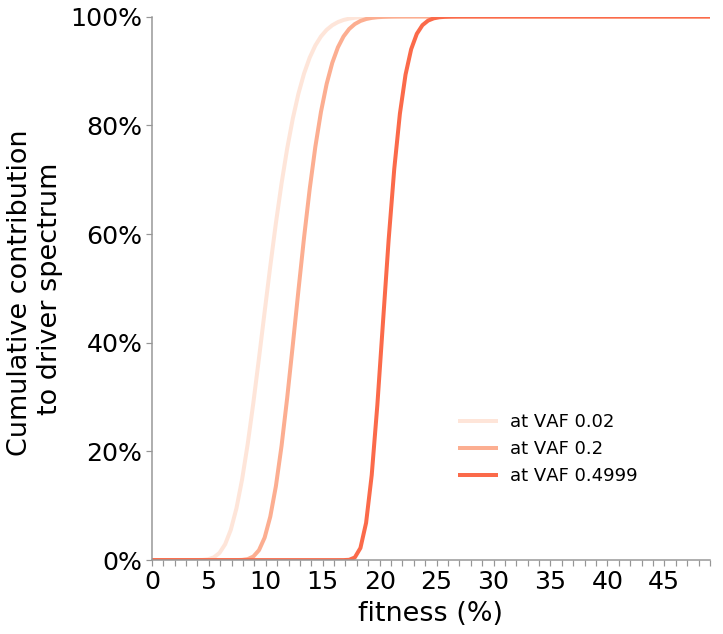

In [44]:
# Cumulative plot for Bolton age dist (only normalizable under a DFE)
N_tau = 10**5
# demonstration_age = 80

lmin = np.log(0.01/100)
lmax = np.log(0.4999)
s_vector = np.linspace(0, 0.5, 100)
s_lower = 0

plt.close('all')
scale = 1.2
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

count = 0
colour_list=[red1, red2, red3, red4, red5]
for log_freq in [np.log(2/100), np.log(20/100), np.log(0.4999)]:
    
    if log_freq == np.log(2/100):
        cumulative = cumulative_dict['2 percent VAF']
    if log_freq == np.log(20/100):
        cumulative = cumulative_dict['20 percent VAF']                                  
    if log_freq == np.log(0.4999):
        cumulative = cumulative_dict['49 percent VAF']
        
    print('at VAF', np.exp(log_freq), 'cumulative = ', cumulative)
    ax1.plot(s_vector, cumulative, c = colour_list[count], lw = 4, label= 'at VAF %s' % round(np.exp(log_freq),4))
    
    
    
#     normalization_of_driver_contrib = lin_nonsyn_density_cohort_ages_with_DFE(log_freq, N_tau, 10**-8,\
#                                                                               s_lower, float('inf'), list_of_Bolton_ages)
#     print('at VAF', np.exp(log_freq), 'normalization_of_driver_contrib = ', normalization_of_driver_contrib)
    
#     cumulative = [lin_nonsyn_density_cohort_ages_with_DFE(log_freq, N_tau, 10**-8, s_lower, s_upper,\
#                                                           list_of_Bolton_ages)/normalization_of_driver_contrib for s_upper in s_vector]
    
#     contribution_beneath_tolerance = lin_nonsyn_density_cohort_ages_with_DFE(log_freq, N_tau, 10**-8, s_lower, s_tolerance,\
#                                                           list_of_Bolton_ages)/normalization_of_driver_contrib 

#     print('contribution of <3.5\% s to driver spectrum is', contribution_beneath_tolerance, 'at VAF', np.exp(log_freq))
    
    count = count + 1

# Set axis limits
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 1)

#  Axis labels
axisfont=14*1.2
axislabelfont=15*1.2


ax1.set_xlabel('fitness (%)', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')
ax1.set_ylabel('Cumulative contribution \nto driver spectrum', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')

x_major_ticks = np.linspace(0,0.5,50)
x_major_tick_labels = ["0","", "","","","5","", "","","", "10","", "","","","15","", "","","", "20","", "","","", "25","", "","","", "30"\
                       ,"", "","","", "35","", "","","", "40","", "","","", "45","", "","","", "50"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont*1.5)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =[0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_major_tick_labels = ['0%',"20%","40%","60%","80%", "100%"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont*1.5)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)


    
ax1.legend(frameon=0, bbox_to_anchor=(0.9, 0.3), fontsize= 18)

# plt.savefig('2021_N_tau_10topower5_s_contribution_age_%s.pdf' % demonstration_age, bbox_inches='tight')        
# plt.savefig('2021_N_tau_10topower5_s_contribution_Bolton_age_distribution.pdf', bbox_inches='tight')   

## figure S9A

In [ ]:
# Stored results: driver spectrum for Bolton age distribution
y_passenger_total = [0.8127352192775136, 0.8086074811112188, 0.8041723583035936, 0.7994081338801056, 0.7942918585927157, 0.7887993258108784, 0.7829050504068792, 0.7765822526964793, 0.7698028487956889, 0.762537449026815, 0.7547553662485361, 0.7464246361810095, 0.7375120519250077, 0.7279832149122456, 0.7178026044639081, 0.7069336679895925, 0.6953389336663105, 0.6829801472487262, 0.6698184345282958, 0.6558144909104905, 0.6409287996110561, 0.6251218800399962, 0.6083545679699854, 0.5905883289830347, 0.5717856063653971, 0.5519102039974367, 0.5309277037987191, 0.5088059158855083, 0.48551535773733034, 0.4610297563314117, 0.4353265644122326, 0.40838747890966176, 0.3801989461791803, 0.3507526354727886, 0.32004585918730494, 0.2880819163420718, 0.2548703347752682, 0.2204269880472139, 0.1847740652627471, 0.14793987613756635, 0.10995847967433386, 0.07086913267474731, 0.03071556372153182, -0.010454911225445652, -0.052592404487964595, -0.09564556579829998, -0.13956273777828432, -0.18429310375321842, -0.22978777058249536, -0.2760007304838617, -0.3228896523286914, -0.37041646453867494, -0.4185477076238287, -0.4672546528257365, -0.5165132019146974, -0.5663035994197392, -0.6166100003135883, -0.667419942151321, -0.7187237706837875, -0.7705140628727939, -0.8227850825709618, -0.8755322936966322, -0.9287519451996625, -0.9824407327307405, -1.036595534464437, -1.0912132133035264, -1.1462904746812341, -1.2018237681105404, -1.257809221087418, -1.3142425954508825, -1.3711192583529495, -1.4284341621789929, -1.4861818297799416, -1.5443563430665153, -1.6029513343412831, -1.661959980785149, -1.721375003420715, -1.7811886728348783, -1.8413928251730873, -1.9019788936795246, -1.9629379637106918, -2.0242608632442542, -2.085938307338763, -2.1479611252936848, -2.2103206160613014, -2.273009105515449, -2.336020827242635, -2.3993533333200103, -2.4630097963297213, -2.5270028577395682, -2.591361262109934, -2.656141743871561, -2.7214513872406667, -2.787492382663651, -2.8546591854200423, -2.923773910692701, -2.996753607215791, -3.079029895961771, -3.193541639050352, -12.629305056776731]

y_passenger_beyond_15p = [-3.9737702006769005, -3.974237756736723, -3.9747247142289828, -3.97523219486014, -3.9757613771578866, -3.9763134909784075, -3.976889812542622, -3.9774916603789943, -3.9781203924661166, -3.978777404813437, -3.9794641316626715, -3.9801820474056004, -3.98093267017725, -3.9817175668980775, -3.982538359325585, -3.9833967304744253, -3.984294430623676, -3.985233282096381, -3.986215182098809, -3.987242103144583, -3.9883160909274533, -3.9894392598819675, -3.9906137869982827, -3.9918419046476603, -3.993125893157053, -3.994468073619294, -3.9958708009805877, -3.997336456923823, -3.998867441626957, -4.000466163281116, -4.002135024403608, -4.003876404476352, -4.005692639173883, -4.007585997237017, -4.009558656697238, -4.011612682497678, -4.0137500074979675, -4.0159724183961565, -4.01828154734476, -4.020678869139687, -4.023165703008909, -4.025743217389358, -4.028412435762833, -4.031174241643589, -4.0340293811081676, -4.036978461715125, -4.040021947151048, -4.043160147357856, -4.046393204184284, -4.049721072737986, -4.053143498592963, -4.056659990845341, -4.060269790741296, -4.063971835278665, -4.06776471487741, -4.0716466239859725, -4.07561530336494, -4.079667972734624, -4.083801252404376, -4.088011072314891, -4.092292566542693, -4.096639950729232, -4.101046379178453, -4.105503777652608, -4.110002647339594, -4.114531835173819, -4.119078265681325, -4.123626629688403, -4.128159025385309, -4.132654547132625, -4.137088816815999, -4.141433451340829, -4.145655457934867, -4.149716546259976, -4.153572342866278, -4.157171489087404, -4.160454597725206, -4.163353036212987, -4.165787493498521, -4.167666273439297, -4.168883237411881, -4.169315290828758, -4.168819269010647, -4.167228022284417, -4.1643454200654535, -4.159939875265547, -4.153735809702203, -4.145402195689408, -4.134536841696227, -4.120644299014628, -4.1031038822042385, -4.081121785059141, -4.0536565284281725, -4.019297572927125, -3.9760571820242494, -3.920990752304993, -3.8494482007733812, -3.7534842065166982, -3.620094222803839, -12.62930511782676]

y_passenger_beyond_12p = [-2.129415912192666, -2.130165179311799, -2.1309543148396592, -2.13178581557676, -2.132662311314266, -2.1335865635050704, -2.134561465039973, -2.1355900414711804, -2.1366754539006565, -2.1378210036356307, -2.139030138583209, -2.1403064611948515, -2.141653737582722, -2.143075907238039, -2.1445770926268386, -2.1461616078669175, -2.147833965737853, -2.1495988824565853, -2.151461279942798, -2.1534262856452675, -2.1554992303230613, -2.157685644391534, -2.1599912534917376, -2.1624219738080597, -2.1649839073883816, -2.1676833374181674, -2.170526723201446, -2.173520694628637, -2.176672046215517, -2.1799877313274623, -2.1834748578079304, -2.187140686707117, -2.190992635971072, -2.1950382907018113, -2.1992854209530077, -2.2037420071163742, -2.208416271987429, -2.213316717794452, -2.218452165998045, -2.223831797590515, -2.229465191904149, -2.235362362447214, -2.241533788859236, -2.247990444560398, -2.254743819967143, -2.2618059412285567, -2.269189384336741, -2.276907284245969, -2.284973338379298, -2.293401803680313, -2.302207486233392, -2.311405722451447, -2.321012350912756, -2.3310436741035874, -2.3415164095868364, -2.3524476304914046, -2.363854695752044, -2.3757551712773415, -2.388166744205929, -2.4011071335874044, -2.4145940020865218, -2.4286448745026097, -2.443277069863161, -2.458507654472481, -2.4743534235193847, -2.4908309186824855, -2.507956488673953, -2.525746398913175, -2.5442169956151677, -2.5633849286282837, -2.583267436508073, -2.603882696758338, -2.625250244137886, -2.6473914606835653, -2.670330142921521, -2.694093154958132, -2.7187111812090228, -2.744219600162501, -2.7706595120198063, -2.7980789703804887, -2.82653449464873, -2.856092980566015, -2.8868341887975215, -2.9188540873978934, -2.952269471914104, -2.9872245190617357, -3.0239003060308556, -3.062528964941126, -3.1034152820393706, -3.146970705818615, -3.1937690157324936, -3.2446418631361587, -3.30085214814284, -3.3644298616916744, -3.4388766955558254, -3.5308116294516414, -3.65448095406033, -3.8478132951753334, -4.26576949995109, -float('inf')]

y_passenger_12p =  [-0.8952696907319118, -0.8966460660878756, -0.8981106508575697, -0.8996693974955614, -0.9013286045161459, -0.9030949264073546, -0.9049753852316866, -0.9069773841246406, -0.9091087227274696, -0.9113776144220764, -0.9137927050625548, -0.9163630927230095, -0.9190983478279847, -0.9220085329366866, -0.9251042214545282, -0.928396514671585, -0.9318970567771758, -0.9356180478390116, -0.9395722551011421, -0.9437730232702662, -0.9482342846597749, -0.9529705701145078, -0.9579970215662197, -0.9633294069368186, -0.9689841380043172, -0.9749782918510467, -0.9813296366438787, -0.9880566626900933, -0.9951786198387063, -1.0027155622037018, -1.0106884007680967, -1.0191189636851634, -1.028030063142125, -1.0374455666949087, -1.047390470238169, -1.0578909694029337, -1.0689745262254808, -1.080669928338882, -1.0930073385542192, -1.106018333352076, -1.119735929367167, -1.1341945973676846, -1.1494302635354117, -1.1654802981260965, -1.182383491932914, -1.2001800214700147, -1.218911404480445, -1.2386204482474876, -1.2593511942027646, -1.2811488633949992, -1.304059808399285, -1.328131478076451, -1.3534124020908644, -1.3799522021201038, -1.4078016361249133, -1.4370126808322237, -1.467638655741238, -1.49973438961527, -1.5333564277912426, -1.5685632760268438, -1.6054156743671677, -1.6439768930195426, -1.684313041823822, -1.7264933858785945, -1.7705906624190764, -1.816681398218127, -1.8648462325720954, -1.9151702582263819, -1.9677434012151997, -2.0226608703124684, -2.0800237173734257, -2.139939561094613, -2.202523538622294, -2.267899562380704, -2.336201974497902, -2.4075777101496714, -2.482189106831961, -2.5602175327794754, -2.6418680593658452, -2.7273754761453524, -2.817012053969877, -2.911097620002952, -3.0100127514880617, -3.1142162797837454, -3.2242689180819597, -3.3408658455851152, -3.4648827745564774, -3.5974428987816918, -3.740017143983066, -3.8945792825097207, -4.063854943466796, -4.251738921644922, -4.464032165528402, -4.709833607780325, -5.004416148337513, -5.375961628995085, -5.884437230463347, -6.691359377128159, -8.49200563585573, -float('inf')]

y_passenger_9p = [-0.2021172739773628, -0.20513693660383014, -0.20837700011785842, -0.21185333911977497, -0.21558282840623075, -0.2195833873100553, -0.22387402664370992, -0.2284748982290018, -0.23340734679036473, -0.23869396380886165, -0.24435864278339514, -0.2504266352431295, -0.25692460683061535, -0.26388069285825494, -0.27132455294609875, -0.2792874246637138, -0.2878021764772883, -0.29690336067462797, -0.3066272672266417, -0.3170119796827318, -0.3280974341634869, -0.3399254823239868, -0.35253995886206035, -0.36598675378826623, -0.3803138892818167, -0.3955716005089525, -0.4118124192234589, -0.4290912582536178, -0.44746549411154374, -0.46699504403438985, -0.4877424329605657, -0.5097728454687891, -0.5331541577329901, -0.5579569451370511, -0.5842544622909623, -0.6121225936376135, -0.6416397744451358, -0.6728868835765056, -0.7059471109085995, -0.7409058035846559, -0.7778502963967925, -0.8168697324622679, -0.8580548808949906, -0.9014979582703166, -0.9472924602314159, -0.9955330085416391, -1.0463152173082368, -1.0997355801858437, -1.1558913784518061, -1.2148806083749253, -1.2768019257540937, -1.3417546062988523, -1.4098385229021744, -1.4811541447914889, -1.555802568692073, -1.6338855978388271, -1.7155058900415137, -1.8007672000897135, -1.8897747437724586, -1.982635710266287, -2.0794599467824884, -2.1803608350165042, -2.285456374619992, -2.3948704865969974, -2.5087345513447588, -2.6271892039298725, -2.7503864244334904, -2.878491984263696, -3.0116883396769674, -3.1501780999790094, -3.294188238234333, -3.4439752555923078, -3.599831557041207, -3.7620933498033975, -3.9311504421268366, -4.107458409129933, -4.291553715214189, -4.484072554888095, -4.685774421093705, -4.897571779986024, -5.120567812059694, -5.356105123508797, -5.605829879278593, -5.871778321010476, -6.156496647017208, -6.463211596553682, -6.796079272868607, -7.160556571943717, -7.563968745606127, -8.016400009358799, -8.532137268889684, -9.132107537192297, -9.84820837437563, -10.73153052653611, -11.869503181509167, -13.427076154034339, -15.769896976664983, -19.980710005773574, -31.644222514522035, -float('inf')]

y_passenger_6p = [-0.11556881801291644, -0.12250972904952513, -0.12999680142285833, -0.13807145683635907, -0.14677791544313173, -0.15616334232799894, -0.16627799943392838, -0.17717540252502653, -0.1889124825344582, -0.20154975044802667, -0.2151514647339261, -0.22978580026474682, -0.24552501770661775, -0.2624456324754078, -0.2806285825562318, -0.30015939469350794, -0.32112834860160655, -0.34363063883135364, -0.36776653368285667, -0.3936415300467838, -0.42136650229734596, -0.4510578424027735, -0.4828375873342876, -0.51683352871381, -0.5531792985114131, -0.5920144235640927, -0.6334843408547967, -0.6777403650385913, -0.7249395998492486, -0.7752447859740227, -0.8288240798744232, -0.8858507608413555, -0.9465028671315693, -1.010962766050314, -1.0794166669925913, -1.1520540904377856, -1.2290673094952071, -1.3106507836984638, -1.3970006073033925, -1.4883139963881145, -1.5847888406834796, -1.6866233474356147, -1.7940158058961413, -1.9071645023633497, -2.0262678169939967, -2.1515245345306835, -2.283134401017979, -2.421298956742521, -2.5662226714334095, -2.718114401218303, -2.8771891789953705, -3.04367034301075, -3.217792005743771, -3.3998018700971824, -3.5899644147634566, -3.788564495642707, -3.9959114424547337, -4.212343763491549, -4.438234599532267, -4.673998083730273, -4.920096764458812, -5.177050234555709, -5.445445091005785, -5.725946337021859, -6.019310350429556, -6.326399595893166, -6.648199369186587, -6.985837037935993, -7.340604480851512, -7.713984703985982, -8.107683886640055, -8.523670331021464, -8.964221923782436, -9.431983777590643, -9.93003779703686, -10.461986180118897, -11.032051568963832, -11.645198002884662, -12.307279396541533, -13.02522657759113, -13.80729102497223, -14.663375113223452, -15.605497597632896, -16.64847310378128, -17.810930709129046, -19.116866498718338, -20.59802929090826, -22.297598506813976, -24.27587768038837, -26.61922402869577, -29.454487743525906, -32.97362783778679, -37.478820957977504, -43.472487932139344, -51.855765084944466, -64.42555878386165, -85.36780860070618, -127.24143263484962, -252.89616193333637, -float('inf')]


y_passenger_total [0.8127352192775136, 0.8086074811112188, 0.8041723583035936, 0.7994081338801056, 0.7942918585927157, 0.7887993258108784, 0.7829050504068792, 0.7765822526964793, 0.7698028487956889, 0.762537449026815, 0.7547553662485361, 0.7464246361810095, 0.7375120519250077, 0.7279832149122456, 0.7178026044639081, 0.7069336679895925, 0.6953389336663105, 0.6829801472487262, 0.6698184345282958, 0.6558144909104905, 0.6409287996110561, 0.6251218800399962, 0.6083545679699854, 0.5905883289830347, 0.5717856063653971, 0.5519102039974367, 0.5309277037987191, 0.5088059158855083, 0.48551535773733034, 0.4610297563314117, 0.4353265644122326, 0.40838747890966176, 0.3801989461791803, 0.3507526354727886, 0.32004585918730494, 0.2880819163420718, 0.2548703347752682, 0.2204269880472139, 0.1847740652627471, 0.14793987613756635, 0.10995847967433386, 0.07086913267474731, 0.03071556372153182, -0.010454911225445652, -0.052592404487964595, -0.09564556579829998, -0.13956273777828432, -0.18429310375321842, -0.

Time:  0.4783690999975079


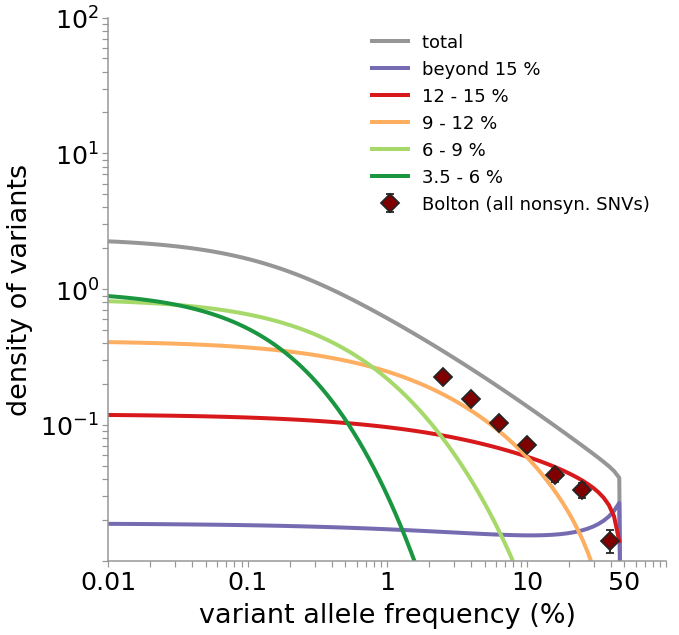

In [36]:
# Driver VAF spectra contributed by different s from the DFE (Bolton age distribution)
import timeit    

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 25}

N_tau=10**5
s_max_inferred = 1 # same result as 10

Boltontotal = 4160
n_bins_Bolton = 7
Boltonmarker='D'
m_size = 14
Boltonmarkersize = m_size*0.9
# plot_log_hist_data_for_plot_solid_no_normalization(all_panels_non_syn_data, Boltontotal, n_bins_Bolton, \
#                             'Bolton (all nonsyn. SNVs)', Boltonmarker, Boltonmarkersize, 'maroon')

list_of_control_ages = list_of_Bolton_ages

start = timeit.default_timer()

x_passenger=np.linspace(np.log(10**-4), np.log(0.4999999), 100)

# from syn. VAF spectra in Bolton
best_fit_driver_u = 1.9482421874998532e-05

s_upper_driver = 1
# y_passenger_total = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, s_tolerance,  s_upper_driver, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_total, c = grey3, lw = 4, label= 'total ')
print('y_passenger_total',y_passenger_total)

s_upper_driver = 1
# y_passenger_beyond_15p = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, 0.15, s_upper_driver, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_beyond_15p, c = color_beyond15p, lw = 4, label= 'beyond 15 %')
print('y_passenger_beyond_15p',y_passenger_beyond_15p)

# y_passenger_beyond_12p = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, 0.12, 0.15, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_beyond_12p, c = color_15p, lw = 4, label= '12 - 15 %')
print('y_passenger_beyond_12p',y_passenger_beyond_12p)

# y_passenger_12p = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, 0.09, 0.12, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_12p, c = color_12p, lw = 4, label= '9 - 12 %')
print('y_passenger_12p ',y_passenger_12p )

# y_passenger_9p = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, 0.06, 0.09, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_9p, c = color_9p, lw = 4, label= '6 - 9 %')
print('y_passenger_9p',y_passenger_9p)

# y_passenger_6p = [log_nonsyn_density_cohort_ages_with_DFE(l, N_tau, best_fit_driver_u, 0.035, 0.06, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_6p, c = color_6p, lw = 4, label= '3.5 - 6 %')
print('y_passenger_6p',y_passenger_6p)

# Set axis limits
ax1.set_ylim(np.log(10**-2), np.log(100))
ax1.set_xlim(np.log(10**-4),np.log(0.5))

# # Axis labels
axisfont=14*1.2
axislabelfont=15*1.2

ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')
ax1.set_ylabel('density of variants', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')

x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                 np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
x_major_tick_labels = ["0.01","","","","","","","","",\
                       "0.1","","","","","","","","",\
                       "1","","","","","","","","",\
                       "10","","","","50","","","","",""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont*1.5)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [\
#                  np.log(10**-14), np.log(10**-12), np.log(10**-10), np.log(10**-8), np.log(10**-6),\
#                  np.log(10**-4), \
                 np.log(10**-2),\
                 np.log(1), np.log(10**2), np.log(10**4), np.log(10**6)]
y_major_tick_labels = [\
#                        "$10^{-14}$","$10^{-12}$","$10^{-10}$","$10^{-8}$","$10^{-6}$",\
#                        "$10^{-4}$",\
                       "$10^{-2}$",\
                      "$10^{0}$","$10^{2}$","$10^{4}$","$10^{6}$"]
y_major_ticks = [np.log(10**-2), np.log(2*10**-2), np.log(3*10**-2), \
                 np.log(4*10**-2), np.log(5*10**-2), np.log(6*10**-2), \
                 np.log(7*10**-2), np.log(8*10**-2), np.log(9*10**-2), \
                 np.log(10**-1), np.log(2*10**-1), np.log(3*10**-1), \
                 np.log(4*10**-1), np.log(5*10**-1), np.log(6*10**-1), \
                 np.log(7*10**-1), np.log(8*10**-1), np.log(9*10**-1), \
                 np.log(1), np.log(2), np.log(3), \
                 np.log(4), np.log(5), np.log(6), \
                 np.log(7), np.log(8), np.log(9), \
                 np.log(10), np.log(20), np.log(30),\
                 np.log(40), np.log(50), np.log(60), \
                 np.log(70), np.log(80), np.log(90),\
                 np.log(100)]
#     y_major_ticks = [c-np.log(10**8) for c in y_major_ticks]
y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                       "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                       "$10^{2}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont*1.5)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)

ax1.legend(frameon=0, fontsize= 18)

# ax1.set_title('Age %s'  % demonstration_age, fontsize=20)

# plt.savefig('2021_N_tau_10topower5_find_sthres_Driver_mathematical_expression_Bolton_age_dist_with_data.pdf', bbox_inches='tight')        

stop = timeit.default_timer()

print('Time: ', stop - start)

# Contribution of different s's in the passenger prediction

### Define passenger theory

In [18]:
# 'beneficial-first' route
def hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau
#     factor of 2 for haploid mutation rates
    expected_density=2*np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N_tau*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*( \
                                                                                      np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
                                         np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

# 'neutral-first' route
def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
#     factor of 2 for haploid mutation rates
    expected_density=2*np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

def expected_density_hitchhiker_mutants_s_single(t, l, s1, b, d, mu_ben, N_tau):
    
    u_driver_at_s1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)
    
    return density

def expected_number_hitchhiker_mutants(t, l, b, d, mu_ben, s_lower, s_upper, N_tau):
    
    result = integrate.quad(lambda s_var: expected_density_hitchhiker_mutants_s_single(t,  l, s_var,\
                                                                        b, d, mu_ben, N_tau), s_lower, s_upper)[0]

    return result

def logProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
    mu_ben= params[2]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)

    
    return np.log(total_density)



In [19]:
color_6p = '#1a9641'
color_9p = '#a6d96a'
color_12p = '#fdae61' # orange
color_15p = '#d7191c' # red
color_beyond15p = '#756bb1' # purple

## figure S10B (for a single age)

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


y_passenger_total [3.5124511715514783, 3.487862813932944, 3.434751121638128, 3.350250133034842, 3.231407947542282, 3.075151061316889, 2.8782130858633677, 2.637035240697337, 2.3476598259621686, 2.0056493561346036, 1.6060697475906331, 1.143577721392386, 0.6126587208039128, 0.008083426665665335, -0.6743090551936971, -1.4363737313323135, -2.275990129691898, -3.185598305158602, -4.152724772481902, -5.1645304610707266, -6.214928938846374, -7.3078592042298745, -8.453249591090845, -9.660963084995988, -10.938438062784948, -12.29145137959672, -13.725253694165232, -15.245135319813578, -16.856670435355014, -18.576808997827857, -20.394876853145366, -22.292310850330196, -24.314081088800325, -26.529695084121453, -28.91086164407497, -31.33979604935501, -33.881749993411965, -36.76380510428473, -40.00917662954514, -43.28669334619108, -46.70421449780352, -50.838446087699495, -55.62245642313927, -60.38521226926825, -66.43860080794896, -73.97919081694361, -82.98054527453122, -96.28343370414079, -120.109741

y_passenger_12p [4.397591832771704, 4.364571511465735, 4.305571140116697, 4.220641692602397, 4.111161898296291, 3.9799486485254314, 3.831003200309363, 3.668815173938429, 3.497399940983157, 3.3194957239313663, 3.1363016189717534, 2.9477542868286597, 2.75299972874476, 2.550740664681751, 2.3393826408665195, 2.1170556492419763, 1.8815892786267558, 1.6304747507831154, 1.3608220172913856, 1.0693134404693414, 0.7521547508848948, 0.40502382037717344, 0.023016979351803996, -0.3994097625300131, -0.8685124323076018, -1.391361148752207, -1.9760047905928808, -2.6317490901400786, -3.3696141672098374, -4.203036559394336, -5.148853225025823, -6.228562128038147, -7.469842796760491, -8.908397778774713, -10.590348423976454, -12.575626953782256, -14.9430191625775, -17.79782597839925, -21.283750304006738, -25.601914256332932, -31.042529681173963, -38.04028556950382, -47.277160408082835, -59.88796562133855, -77.91237890576585, -105.42462693794332, -151.9212889674877, -245.86718701539067, -529.4687180930604,

y_passenger_total [9.520403697178665, 9.472080457820333, 9.399504096073668, 9.303741460618992, 9.187040196640309, 9.052694609201051, 8.904633095741117, 8.746811950145604, 8.582635498835753, 8.41463117429743, 8.244449229355176, 8.073067811884176, 7.901029799997196, 7.728615837179665, 7.555948278430149, 7.383053752356789, 7.209904514955067, 7.036445929108227, 6.862612891221129, 6.688338696375714, 6.513560035184272, 6.338220227595022, 6.162271000308002, 5.985672194470607, 5.808388709895145, 5.630384472503563, 5.451614048903514, 5.272013406981496, 5.091491727966447, 4.90992565802243, 4.727155964427539, 4.542984934501788, 4.357171985858464, 4.169425184919535, 3.979387005815048, 3.7866126331660337, 3.5905378752797943, 3.390431224627715, 3.1853203551719624, 2.973875349768271, 2.754215920186307, 2.5235769505405523, 2.2776933512531095, 2.009582106754897, 1.7068914579825833, 1.3453518033865497, 0.8693998925878277, 0.1161308734835237, -1.697410947408269, -inf]
y_passenger_beyond_15p [6.9949450565

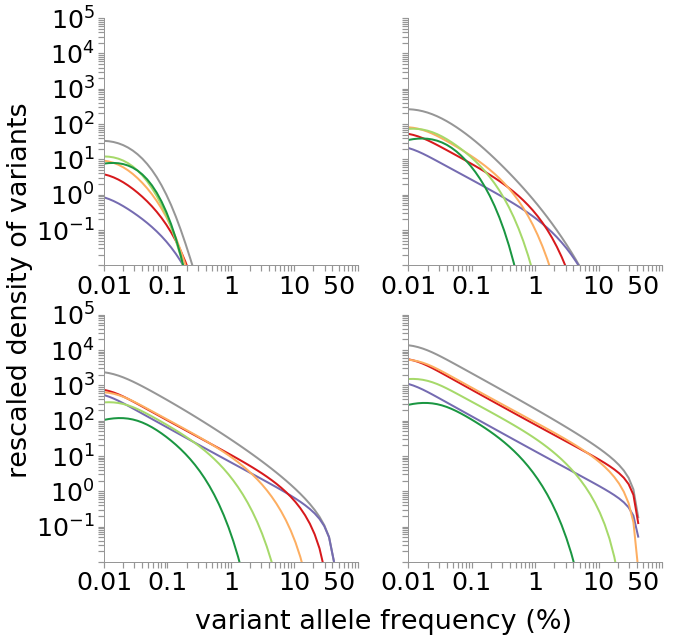

In [11]:
# passenger spectrum for ages 20, 40, 60, 80
import timeit
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(2, 2, sharey=True, sharex=False, figsize=(10, 10))

N_tau=10**5
m = 0
n = 0
for demonstration_age in [20,40,60,80]:
    
    list_of_control_ages = [demonstration_age]

    s_max_inferred = 1 # same result as 10

    start = timeit.default_timer()

    x_passenger=np.linspace(np.log(10**-4), np.log(0.4999999), 50)

    # from syn. VAF spectra in Bolton
    best_fit_u = 1.9482421874998532e-05

    y_passenger_total = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_total, c = grey3, lw = 2, label= 'total from 3.5 %')
    print('y_passenger_total', y_passenger_total)

    y_passenger_beyond_15p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.15, s_max_inferred, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_beyond_15p, c = color_beyond15p, lw = 2, label= 'beyond 15 %')
    print('y_passenger_beyond_15p', y_passenger_beyond_15p)

    y_passenger_beyond_12p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.12, 0.15, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_beyond_12p, c = color_15p, lw = 2, label= '12 - 15 %')
    print('y_passenger_beyond_12p', y_passenger_beyond_12p)

    y_passenger_12p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.09, 0.12, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_12p, c = color_12p, lw = 2, label= '9 - 12 %')
    print('y_passenger_12p', y_passenger_12p)

    y_passenger_9p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.06, 0.09, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_9p, c = color_9p, lw = 2, label= '6 - 9 %')
    print('y_passenger_9p', y_passenger_9p)

    y_passenger_6p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.035, 0.06, list_of_control_ages) for l in x_passenger]
    ax1[m][n].plot(x_passenger, y_passenger_6p, c = color_6p, lw = 2, label= '3.5 - 6 %')
    print('y_passenger_6p', y_passenger_6p)

    # Set axis limits
    ax1[m][n].set_ylim(np.log(10**-2), np.log(10**5))
    ax1[m][n].set_xlim(np.log(10**-4),np.log(0.5))

    # # Axis labels
    axisfont=14*1.2
    axislabelfont=15*1.2

#     ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')
#     ax1.set_ylabel('relative density of variants', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1[m][n].set_xticks(x_major_ticks)
    ax1[m][n].set_xticklabels(x_major_tick_labels, fontsize = axisfont*1.5)
    ax1[m][n].xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(10**-2), np.log(2*10**-2), np.log(3*10**-2), \
                     np.log(4*10**-2), np.log(5*10**-2), np.log(6*10**-2), \
                     np.log(7*10**-2), np.log(8*10**-2), np.log(9*10**-2), \
                     np.log(10**-1), np.log(2*10**-1), np.log(3*10**-1), \
                     np.log(4*10**-1), np.log(5*10**-1), np.log(6*10**-1), \
                     np.log(7*10**-1), np.log(8*10**-1), np.log(9*10**-1), \
                     np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300),\
                     np.log(400), np.log(500), np.log(600), \
                     np.log(700), np.log(800), np.log(900),\
                     np.log(1000), np.log(2000), np.log(3000),\
                     np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                     np.log(10000), np.log(20000), np.log(30000),\
                     np.log(40000), np.log(50000), np.log(60000), \
                     np.log(70000), np.log(80000), np.log(90000),\
                     np.log(100000)]
    #     y_major_ticks = [c-np.log(10**8) for c in y_major_ticks]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "",\
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]

    ax1[m][n].set_yticks(y_major_ticks)
    ax1[m][n].set_yticklabels(y_major_tick_labels, fontsize = axisfont*1.5)
    ax1[m][n].yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1[m][n].spines['top'].set_visible(False)
    ax1[m][n].spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_linewidth(1)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_color(grey3)

#     ax1[m][n].legend(frameon=0, fontsize= 18)
    
#     ax1[m][n].set_title('Age %s'  % demonstration_age, fontsize=20)
    
    if n <1:
        n = n + 1
    else:
        n = 0
        m = m + 1

f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('variant allele frequency (%)', fontsize = axislabelfont*1.5, labelpad = 6*5, fontweight = 'medium')
#     ax1[m][n].set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
plt.ylabel('rescaled density of variants', fontsize = axislabelfont*1.5, labelpad = 6*8, fontweight = 'medium')
    
# plt.savefig('2021_N_tau_10topower5_Passenger_mathematical_expression_single_age_quardrant.pdf', bbox_inches='tight')   

stop = timeit.default_timer()

print('Time: ', stop - start)

## figure S10A (for Bolton cohort age distribution)

In [10]:
# Stored results

y_passenger_total =  [8.37844559476551, 8.327912124628524, 8.25386332153754, 8.157523602296793, 8.041168196004833, 7.907936013369378, 7.761421265129365, 7.605149829334625, 7.4421287272949, 7.2746238565605, 7.104182477509601, 6.931792081719783, 6.758051668108293, 6.583297495929984, 6.407687214311542, 6.231263389417745, 6.0540061168997115, 5.875872712054832, 5.696821658008017, 5.516822961202946, 5.335859819556978, 5.1539254679580475, 4.971017194468723, 4.787128735845337, 4.602242268799272, 4.416321428571965, 4.229305954099853, 4.041109077200274, 3.8516163129340235, 3.6606852215398584, 3.46814437619974, 3.2737903376087605, 3.077381589550028, 2.878628528483961, 2.67717843610601, 2.4725935792827496, 2.2643191607829594, 2.0516368394459317, 1.8335912272707569, 1.6088771770738848, 1.3756524779349288, 1.1312152674530571, 0.8714139225740082, 0.5894852107410444, 0.2735405095637152, -0.09960301573805973, -0.5825310303756446, -1.327580556578387, -3.0543991520034606, -float('inf')]
y_passenger_beyond_15p = [6.421754140324926, 6.320628684106865, 6.196574003645771, 6.053565757364551, 5.896593088079568, 5.730732481641845, 5.560157466840723, 5.387587526055052, 5.214391423513312, 5.041087622607021, 4.867822180824888, 4.694629365044944, 4.521521545987165, 4.348508980104439, 4.175602507304073, 4.002813742004794, 3.8301550225595897, 3.657639308183252, 3.4852800212032453, 3.313090819739985, 3.141085283007154, 2.969276488260526, 2.7976764540193173, 2.6262954192325796, 2.4551409213398503, 2.2842166274434863, 2.1135208607497242, 1.9430447481562823, 1.7727698923874255, 1.6026654365708866, 1.4326842606955652, 1.2627585687269107, 1.0927929139822248, 0.9226566655392642, 0.7521723532954544, 0.5811000029686282, 0.4091144139180872, 0.23577137555818165, 0.060455550711003336, -0.11770296645649235, -0.2999680338538905, -0.4882421081945662, -0.6855217371856794, -0.896810069191832, -1.1311258156546566, -1.4065219048029083, -1.7651061570729119, -2.332832440428648, -3.733111721544816, -float('inf')]
y_passenger_beyond_12p = [7.419645059541824, 7.34787610821155, 7.250492219081224, 7.129734761664436, 6.989396566898859, 6.834386291743896, 6.669842693118693, 6.500119740445977, 6.328151577863806, 6.155473535897642, 5.982694193811333, 5.809994367078821, 5.637418134131428, 5.464979899118202, 5.292689463134213, 5.120555390869458, 4.9485848284089125, 4.776782871023353, 4.6051517652548615, 4.433689939470975, 4.262390840278324, 4.091241550979464, 3.920221166717371, 3.7492988984401494, 3.578431873314186, 3.407562591371448, 3.2366159842901223, 3.0654959978752427, 2.894081579167431, 2.722221883723162, 2.5497304175932527, 2.3763776740354237, 2.2018816183218064, 2.0258949866553526, 1.8479879449093388, 1.6676237521654886, 1.4841237771623206, 1.2966158501456557, 1.1039556772417012, 0.9046029759575663, 0.6964179189958424, 0.47630952123120385, 0.23959057727284666, -0.021297161066689434, -0.3195538820140311, -0.6808636322313151, -1.1636566800719468, -1.938976240290373, -3.8379475133192544, -float('inf')]
y_passenger_12p = [7.259485452314927, 7.222256832861491, 7.158947466762485, 7.069876600882676, 6.956812742680766, 6.82308032570913, 6.6732709448945124, 6.51249242518965, 6.345371261751715, 6.1752752008885095, 6.004129967714638, 5.832773928470116, 5.661468178533189, 5.490253419154255, 5.319105533435623, 5.147978735250798, 4.976811751942642, 4.805526385850378, 4.63402499691407, 4.4621877999711, 4.28987009263131, 4.116899470344367, 3.9430730747499267, 3.7681549010526934, 3.5918731552470256, 3.4139176016308133, 3.2339367777784735, 3.051534884588287, 2.866268089905541, 2.677639914426628, 2.4850952784451517, 2.288012631163195, 2.085693286562125, 1.8773465538170078, 1.662068356424969, 1.4388096211719104, 1.206328514834691, 0.9631170683626292, 0.707286680049535, 0.43638585965422266, 0.14710164395592484, -0.16525012721024288, -0.5076455086135188, -0.8911441146524087, -1.3347300357053224, -1.874678000822101, -2.591983605897534, -3.7197047812278052, -6.380083884228319, -float('inf')]
y_passenger_9p = [6.253322171910801, 6.26179645373658, 6.246553783745498, 6.2061802464612, 6.140064282100421, 6.048735078747282, 5.934123810440001, 5.799592324869956, 5.64957620250837, 5.488825986473036, 5.321488891194651, 5.15045289209441, 4.977237434086698, 4.802335691834401, 4.625671030420455, 4.446915741458446, 4.265635346356862, 4.081332587748161, 3.8934566941248896, 3.70140563716141, 3.5045282722322155, 3.3021272644309723, 3.093462617664669, 2.877755424591482, 2.6541913618617574, 2.421923358987995, 2.180072704646161, 1.927727556427346, 1.663937379651388, 1.38770134619845, 1.09794831435992, 0.7935057167057297, 0.47305425283731795, 0.135064155736716, -0.2222936985929239, -0.6012729657062261, -1.0047311703431179, -1.4363913515331925, -1.9012313623074715, -2.406078496083974, -2.960553128762627, -3.578649012949743, -4.28156805045108, -5.103221430952027, -6.101883448947, -7.387740686349057, -9.199284270767334, -12.181446789836114, -19.240710198910463, -float('inf')]
y_passenger_6p = [4.847760528571561, 4.906872839293618, 4.947283663892966, 4.966710750868205, 4.962936791932027, 4.933988390925263, 4.878373971974957, 4.795363966856314, 4.685262175383742, 4.549571794518737, 4.39092813666377, 4.2127018396266855, 4.018311414145815, 3.810475698116956, 3.5907252129963627, 3.359350123204293, 3.115691750864933, 2.8585295353331515, 2.5863735629944324, 2.297619995749252, 1.9906156989138606, 1.663682923306304, 1.3151271377476315, 0.9432310877374028, 0.5462310486887773, 0.12227021165791062, -0.3306747990062881, -0.8148964690194085, -1.3330890224536907, -1.8885133266091814, -2.4852003055143324, -3.1282047213550035, -3.823927580428496, -4.580535481093055, -5.408524940312299, -6.321512631455328, -7.337374596389009, -8.479904051755277, -9.781230805879739, -11.28543853296382, -13.054352926149525, -15.177878428901256, -17.794796818489356, -21.138461021932407, -25.642387446344404, -32.20015413145439, -42.91604076693687, -64.06373894749818, -126.79187803326445, -float('inf')]


y_passenger_beyond_15p [6.421754140324926, 6.320628684106865, 6.196574003645771, 6.053565757364551, 5.896593088079568, 5.730732481641845, 5.560157466840723, 5.387587526055052, 5.214391423513312, 5.041087622607021, 4.867822180824888, 4.694629365044944, 4.521521545987165, 4.348508980104439, 4.175602507304073, 4.002813742004794, 3.8301550225595897, 3.657639308183252, 3.4852800212032453, 3.313090819739985, 3.141085283007154, 2.969276488260526, 2.7976764540193173, 2.6262954192325796, 2.4551409213398503, 2.2842166274434863, 2.1135208607497242, 1.9430447481562823, 1.7727698923874255, 1.6026654365708866, 1.4326842606955652, 1.2627585687269107, 1.0927929139822248, 0.9226566655392642, 0.7521723532954544, 0.5811000029686282, 0.4091144139180872, 0.23577137555818165, 0.060455550711003336, -0.11770296645649235, -0.2999680338538905, -0.4882421081945662, -0.6855217371856794, -0.896810069191832, -1.1311258156546566, -1.4065219048029083, -1.7651061570729119, -2.332832440428648, -3.733111721544816, -inf]

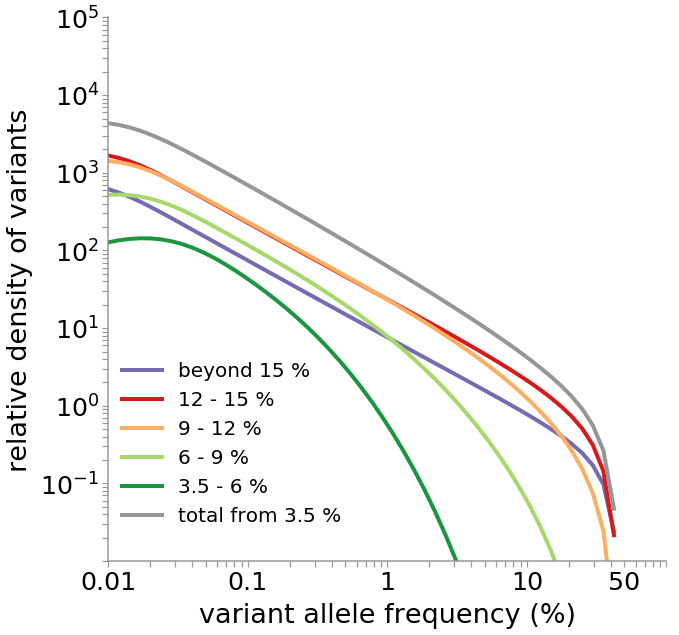

In [23]:
# plotting the figure
import timeit

N_tau=10**5

list_of_control_ages = list_of_Bolton_ages

s_max_inferred = 1 # same result as 10

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 25}

start = timeit.default_timer()

x_passenger=np.linspace(np.log(10**-4), np.log(0.4999999), 50)

# from syn. VAF spectra in Bolton
best_fit_u = 1.9482421874998532e-05



y_passenger_beyond_15p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.15, s_max_inferred, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_beyond_15p, c = color_beyond15p, lw = 4, label= 'beyond 15 %')
print('y_passenger_beyond_15p', y_passenger_beyond_15p)

y_passenger_beyond_12p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.12, 0.15, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_beyond_12p, c = color_15p, lw = 4, label= '12 - 15 %')
print('y_passenger_beyond_12p', y_passenger_beyond_12p)

y_passenger_12p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.09, 0.12, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_12p, c = color_12p, lw = 4, label= '9 - 12 %')
print('y_passenger_12p', y_passenger_12p)

y_passenger_9p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.06, 0.09, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_9p, c = color_9p, lw = 4, label= '6 - 9 %')
print('y_passenger_9p', y_passenger_9p)

y_passenger_6p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0.035, 0.06, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_6p, c = color_6p, lw = 4, label= '3.5 - 6 %')
print('y_passenger_6p', y_passenger_6p)

y_passenger_total = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, list_of_control_ages) for l in x_passenger]
ax1.plot(x_passenger, y_passenger_total, c = grey3, lw = 4, label= 'total from 3.5 %')
print('y_passenger_total', y_passenger_total)

# Set axis limits
ax1.set_ylim(np.log(10**-2), np.log(10**5))
ax1.set_xlim(np.log(10**-4),np.log(0.5))

# # Axis labels
axisfont=14*1.2
axislabelfont=15*1.2

ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')
ax1.set_ylabel('relative density of variants', fontsize = axislabelfont*1.5, labelpad = 6*1.2, fontweight = 'medium')

x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                 np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
x_major_tick_labels = ["0.01","","","","","","","","",\
                       "0.1","","","","","","","","",\
                       "1","","","","","","","","",\
                       "10","","","","50","","","","",""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont*1.5)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(10**-2), np.log(2*10**-2), np.log(3*10**-2), \
                     np.log(4*10**-2), np.log(5*10**-2), np.log(6*10**-2), \
                     np.log(7*10**-2), np.log(8*10**-2), np.log(9*10**-2), \
                     np.log(10**-1), np.log(2*10**-1), np.log(3*10**-1), \
                     np.log(4*10**-1), np.log(5*10**-1), np.log(6*10**-1), \
                     np.log(7*10**-1), np.log(8*10**-1), np.log(9*10**-1), \
                     np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300),\
                     np.log(400), np.log(500), np.log(600), \
                     np.log(700), np.log(800), np.log(900),\
                     np.log(1000), np.log(2000), np.log(3000),\
                     np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                     np.log(10000), np.log(20000), np.log(30000),\
                     np.log(40000), np.log(50000), np.log(60000), \
                     np.log(70000), np.log(80000), np.log(90000),\
                     np.log(100000)]
    #     y_major_ticks = [c-np.log(10**8) for c in y_major_ticks]
y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                       "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                       "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "",\
                       "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont*1.5)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)

ax1.legend(bbox_to_anchor=(0.45, 0.4), frameon=0, fontsize= 20)

# plt.savefig('2021_N_tau_10topower5_Passenger_mathematical_expression_Bolton_cohort.pdf', bbox_inches='tight')   

# y_passenger_0p = [logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, 0, 0.035, list_of_control_ages) for l in x_passenger]
# ax1.plot(x_passenger, y_passenger_0p, c = 'red', lw = 4, label= '< 3.5 %')


stop = timeit.default_timer()

print('Time: ', stop - start)